In [1]:
import tensorflow as tf
import CapsLayer as cp
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
input_dim = [28,28] #784

X = tf.placeholder(shape=[None, input_dim[0],input_dim[1], 1], dtype=tf.float32, name="X")
y = tf.placeholder(shape=[None, input_dim[0],input_dim[1], 1], dtype=tf.float32, name="y")

In [3]:
conv = cp.conv_to_caps(X,num_maps=1,caps_dims=4,kernel_size = 1,strides = 1,name="conv2")
caps1 = cp.capsule(conv,num_caps=5,caps_dims=2,batch_size=tf.shape(X)[0],name="caps1")

caps_bridge = tf.reshape(caps1,[tf.shape(X)[0],caps1.shape[1]*caps1.shape[2]],name = "caps1_bridge")
dense = tf.layers.dense(caps_bridge,input_dim[0]*input_dim[1])

output_caps = dense
print("kk")

kk


In [4]:

output = tf.reshape(output_caps,[tf.shape(X)[0],input_dim[0],input_dim[1],1])
print(output)

Tensor("Reshape_2:0", shape=(?, 28, 28, 1), dtype=float32)


In [5]:
loss = tf.reduce_mean(tf.square(output-y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_op = optimizer.minimize(loss, name="training_op")

init = tf.global_variables_initializer()


Starting Training
Iteration: 500/3437 (14.5%)  Loss: 0.04362

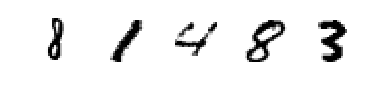

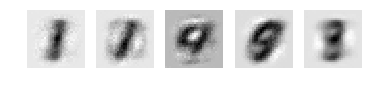

Iteration: 1000/3437 (29.1%)  Loss: 0.03554

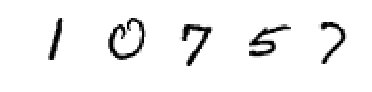

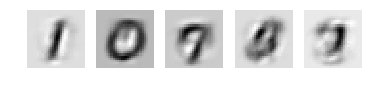

Iteration: 1500/3437 (43.6%)  Loss: 0.04046

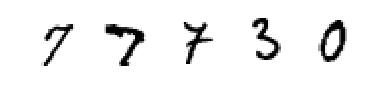

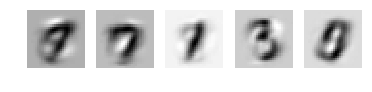

Iteration: 2000/3437 (58.2%)  Loss: 0.03163

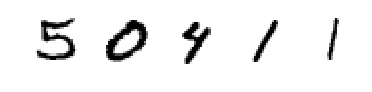

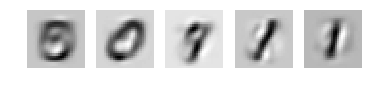

Iteration: 2500/3437 (72.7%)  Loss: 0.03633

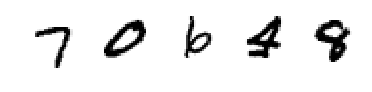

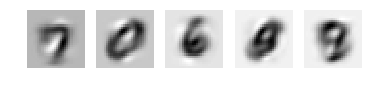

Iteration: 3000/3437 (87.3%)  Loss: 0.03798

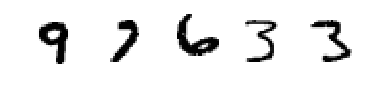

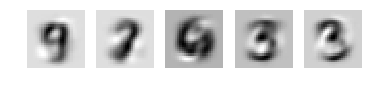

Iteration: 3437/3437 (100.0%)  Loss: 0.03732

In [6]:
n_epochs = 1
batch_size = 16

n_iterations_per_epoch = mnist.train.num_examples // batch_size
with tf.Session() as sess:
    print("Starting Training")
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(1, n_iterations_per_epoch + 1):
            X_batch,_ = mnist.train.next_batch(batch_size)
            y_batch = X_batch
            X_batch = X_batch.reshape([-1, input_dim[0], input_dim[0], 1])
            y_batch = y_batch.reshape([-1, input_dim[0], input_dim[0], 1])
            _,loss_train,pred = sess.run([training_op,loss,output],feed_dict={X: X_batch,
                           y: y_batch})
            
            print(("\rIteration: {}/{} ({:.1f}%)  Loss: {:.5f}").format(
                      iteration, n_iterations_per_epoch,
                      iteration * 100 / n_iterations_per_epoch,
                      loss_train),
                  end="")
            if(iteration % 500 == 0):
                #index = 0
                n_samples = 5
                for index in range(n_samples):
                    #plt.figure(figsize=(n_samples * 2, 3))
                    plt.subplot(1, n_samples, index + 1)
                    #plt.title("Predicted:" + str(pred[index]))
                    plt.imshow(np.squeeze(y_batch[index]), cmap="binary")
                    plt.axis("off")
                plt.show()
                for index in range(n_samples):

                    plt.subplot(1, n_samples, index + 1)
                    #plt.title("Predicted:" + str(pred[index]))
                    plt.imshow(np.squeeze(pred[index]), cmap="binary")
                    plt.axis("off")

                plt.show()

           # plt.imshow(np.squeeze(y_batch[0]), cmap="binary")

            #plt.imshow(y_batch[0], cmap="binary")